In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [12, 8]


# read the data and drop information regarding z axis, time frame and vicon tracking labels
data = pd.read_csv('./recordingTest8minutes.csv')
data.columns = ['Time frame', 'RobotName', 'XCoord', 'YCoord', 'ZCoord', 'XOrient', 'YOrient', 'ZOrient', 'LMotor', 'RMotor']
data_reduced = data.drop(['Time frame', 'RobotName', 'ZCoord', 'ZOrient'], 1)

In [139]:
# check number of datapoints
data_reduced.shape

(71743, 6)

In [140]:
# check for any nan values
data_reduced.isnull().values.any()

False

Text(0.5, 1.0, 'RMotor')

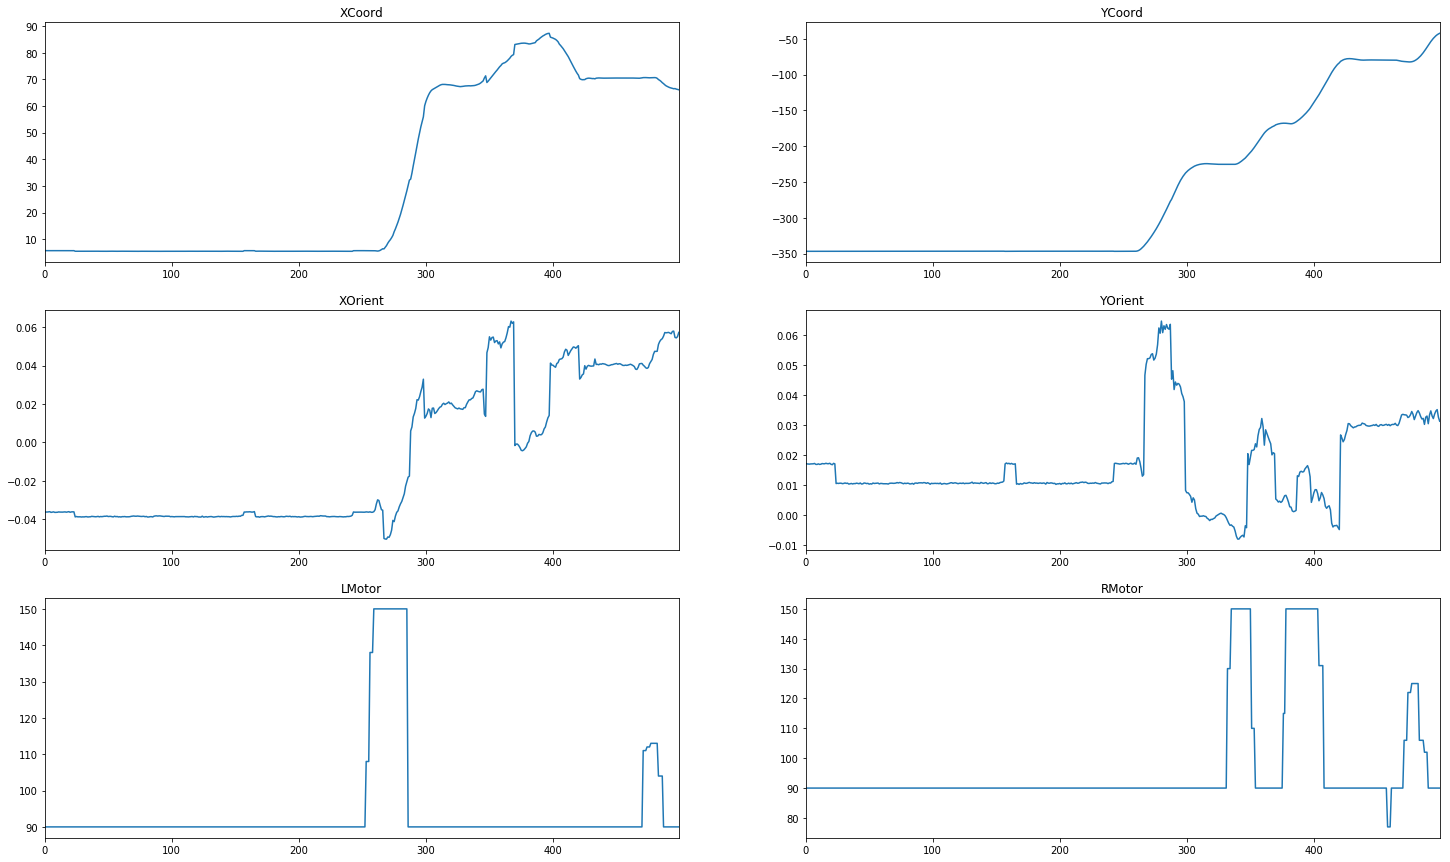

In [141]:
# Look at the data as time series, one column at a time. First 500 points.
fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'][0:500].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'][0:500].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'][0:500].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'][0:500].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'][0:500].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'][0:500].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

Text(0.5, 1.0, 'RMotor')

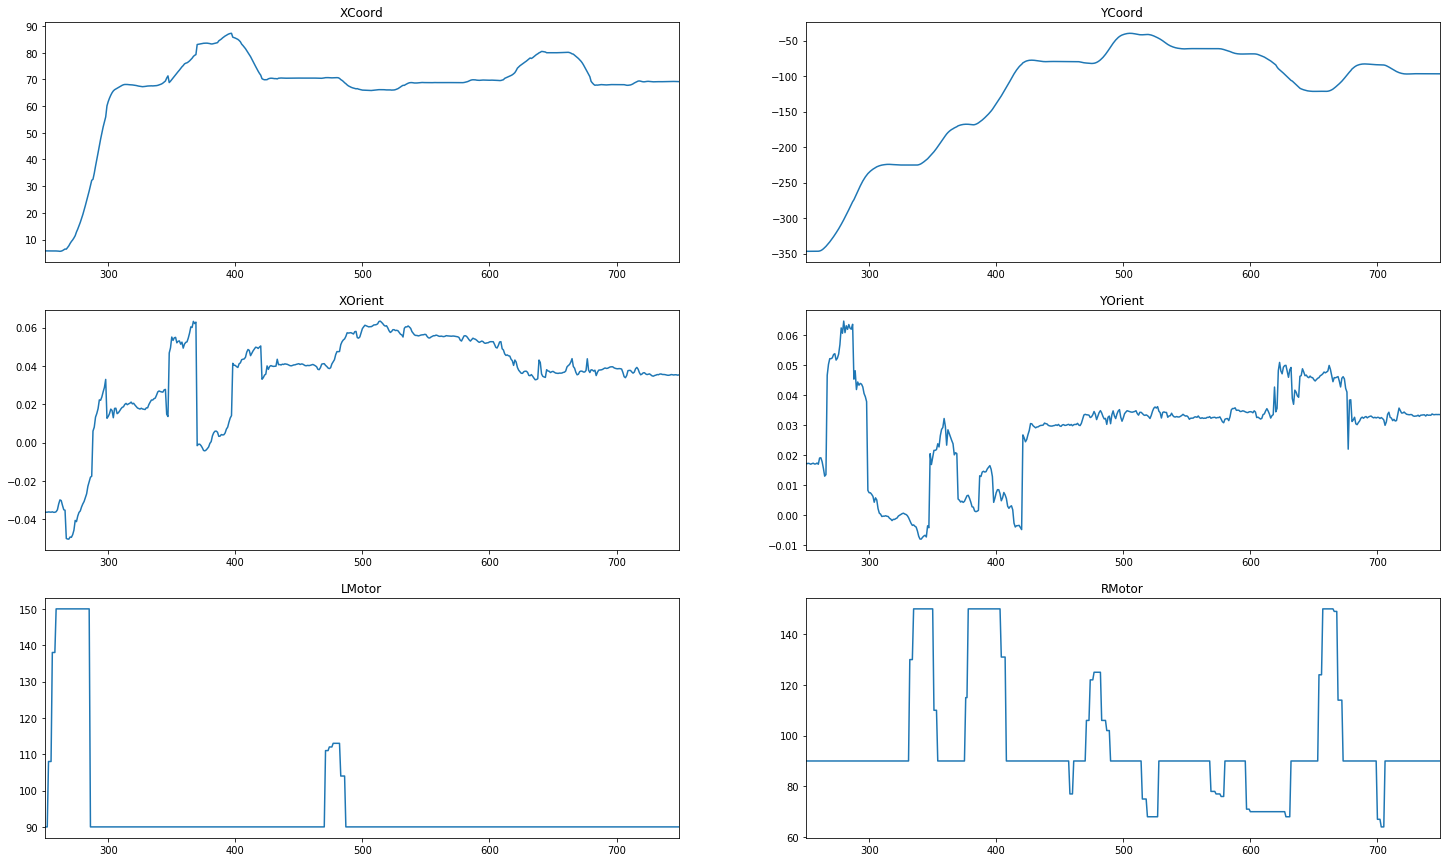

In [142]:
# Remove first 250 since there is no activity
data_reduced = data_reduced.iloc[250:]

# Replot data
fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'][0:500].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'][0:500].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'][0:500].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'][0:500].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'][0:500].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'][0:500].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

Text(0.5, 1.0, 'RMotor')

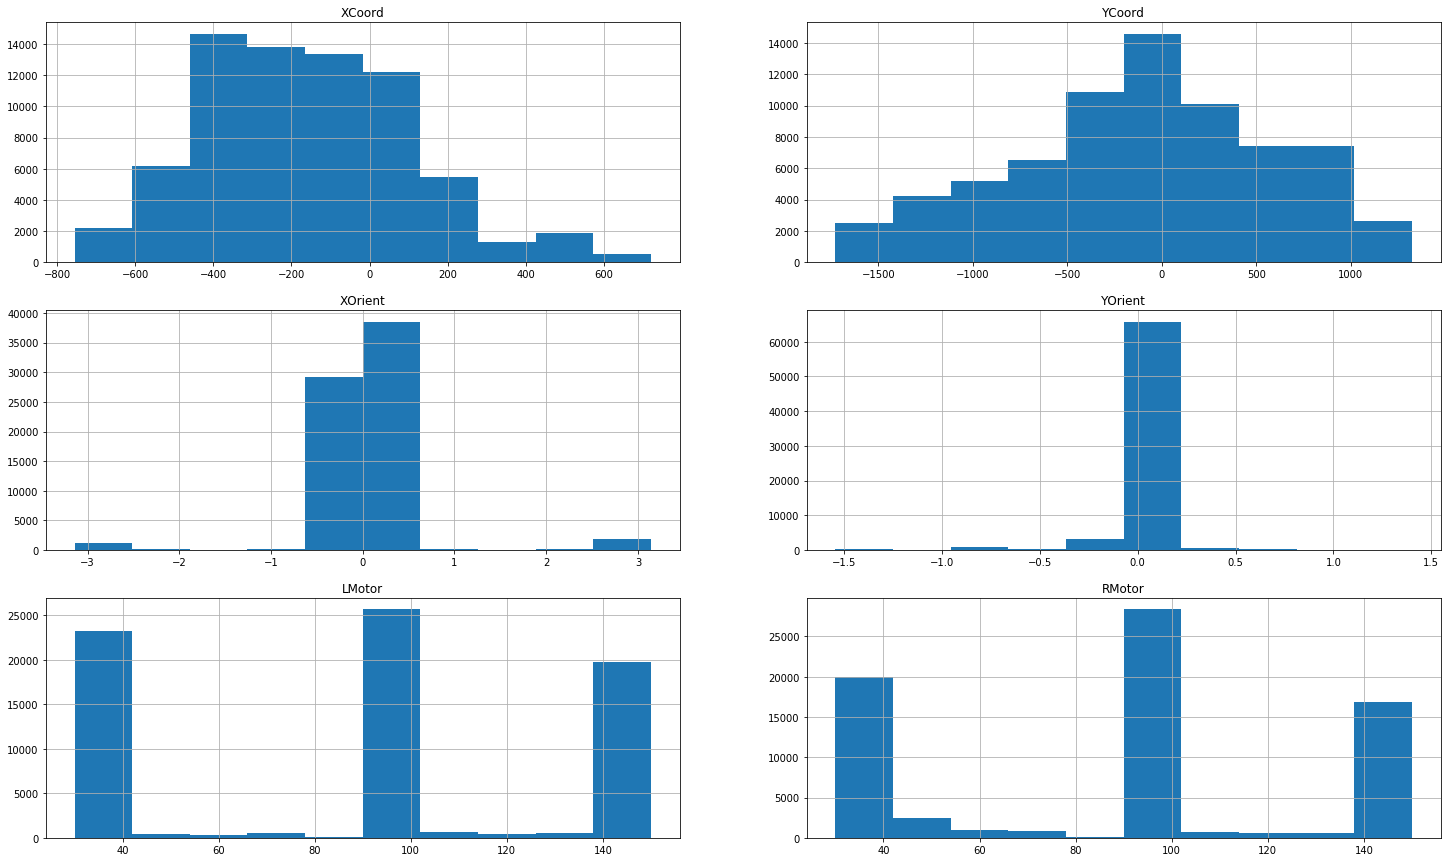

In [143]:
# Look at the data, one column at a time
fig2, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'].hist(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'].hist(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'].hist(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'].hist(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'].hist(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'].hist(ax=axes[2,1]); axes[2,1].set_title('RMotor')

(71493, 6)
(35747, 6)


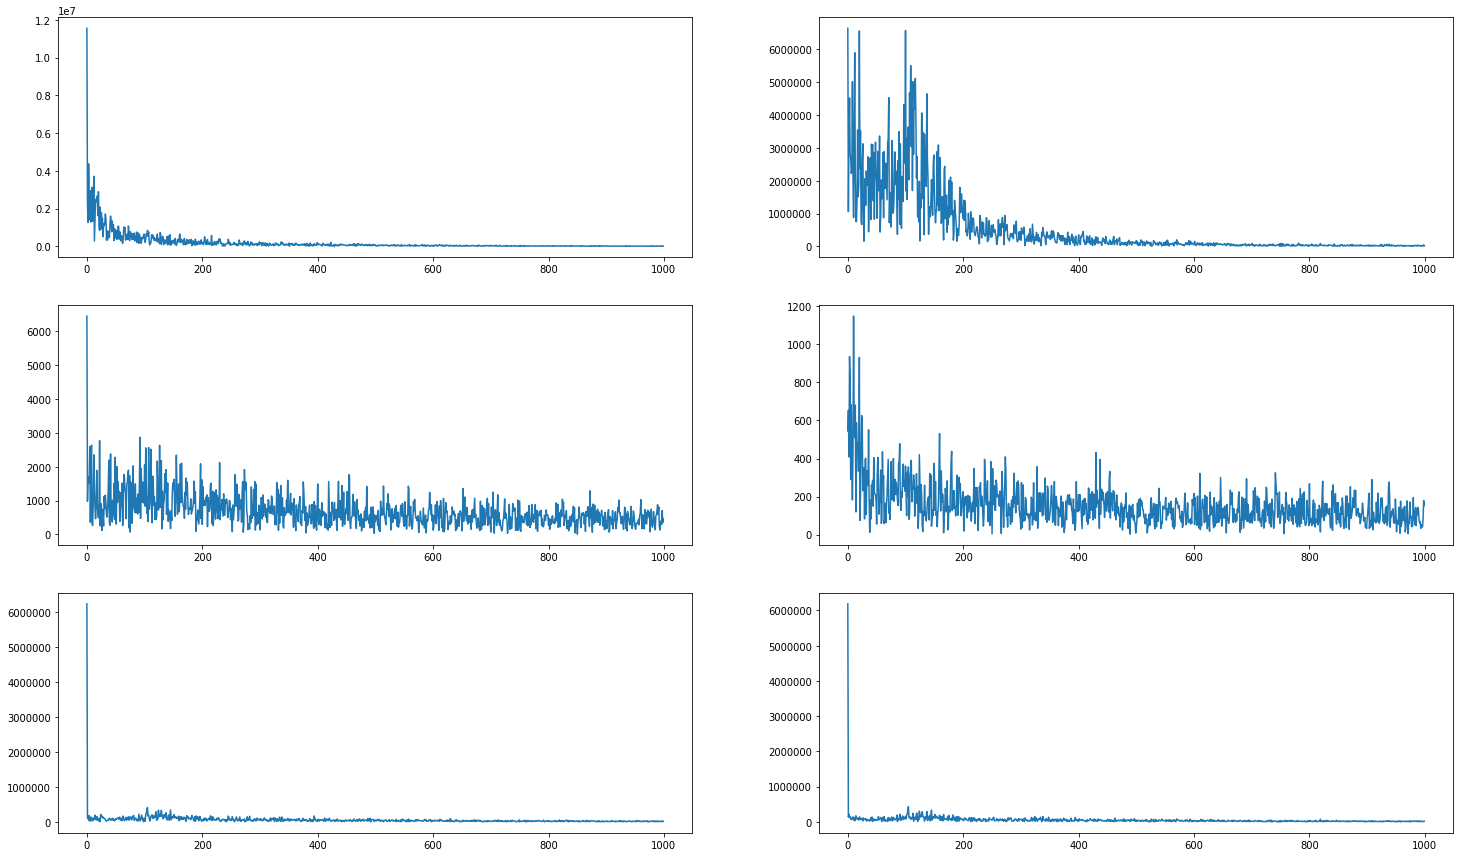

In [144]:
# have a look at the spectrum of the data

print(data_reduced.values.shape)
data_frequency = np.fft.rfft(data_reduced.values, axis=0)

print(data_frequency.shape)

fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
plt.subplot(3,2,1)
plt.plot(np.abs(data_frequency[:1000,0]))
plt.subplot(3,2,2)
plt.plot(np.abs(data_frequency[:1000,1]))
plt.subplot(3,2,3)
plt.plot(np.abs(data_frequency[:1000,2]))
plt.subplot(3,2,4)
plt.plot(np.abs(data_frequency[:1000,3]))
plt.subplot(3,2,5)
plt.plot(np.abs(data_frequency[:1000,4]))
plt.subplot(3,2,6)
plt.plot(np.abs(data_frequency[:1000,5]))

Text(0.5, 1.0, 'RMotor')

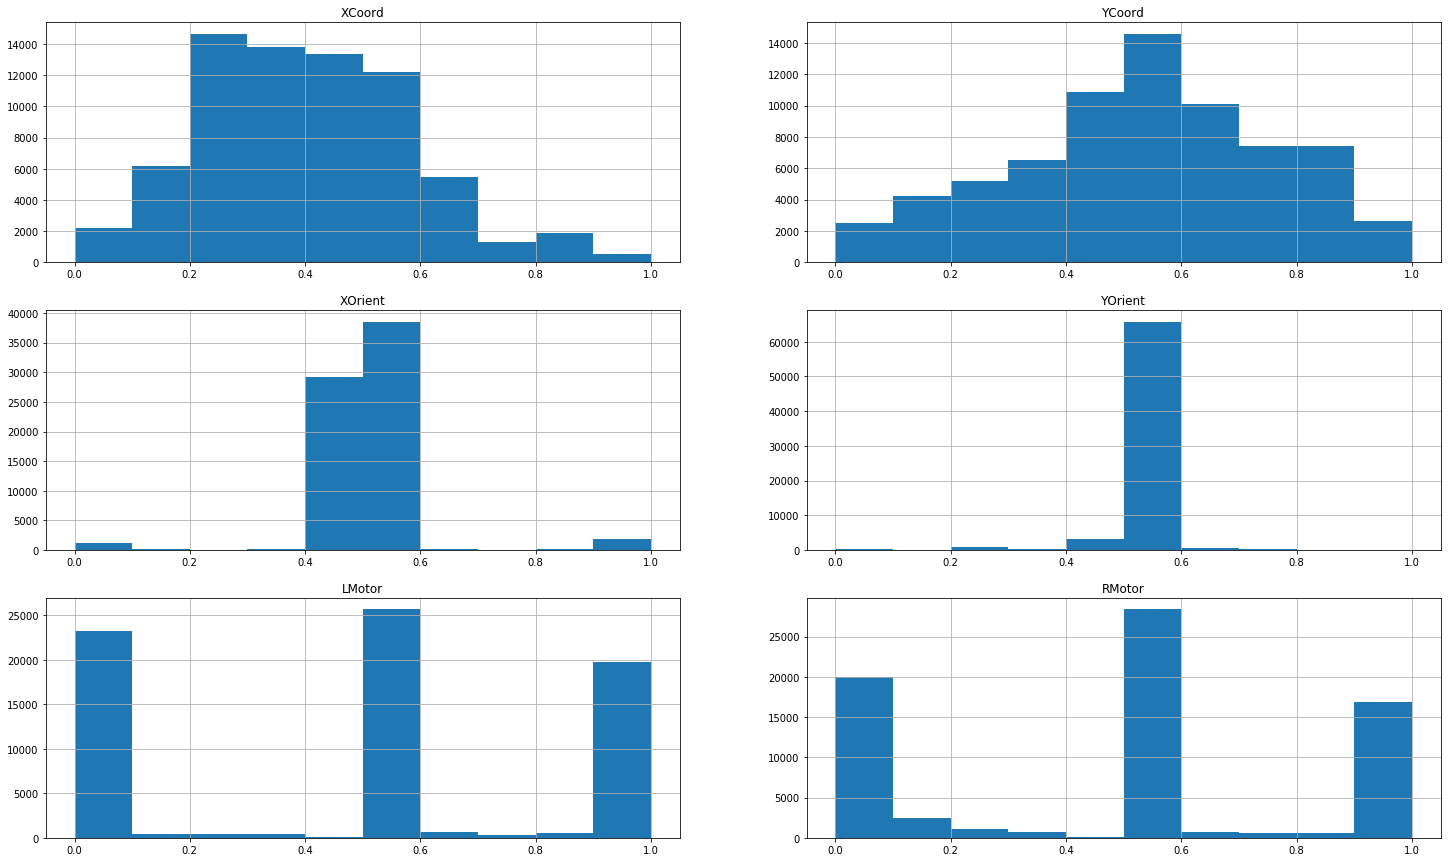

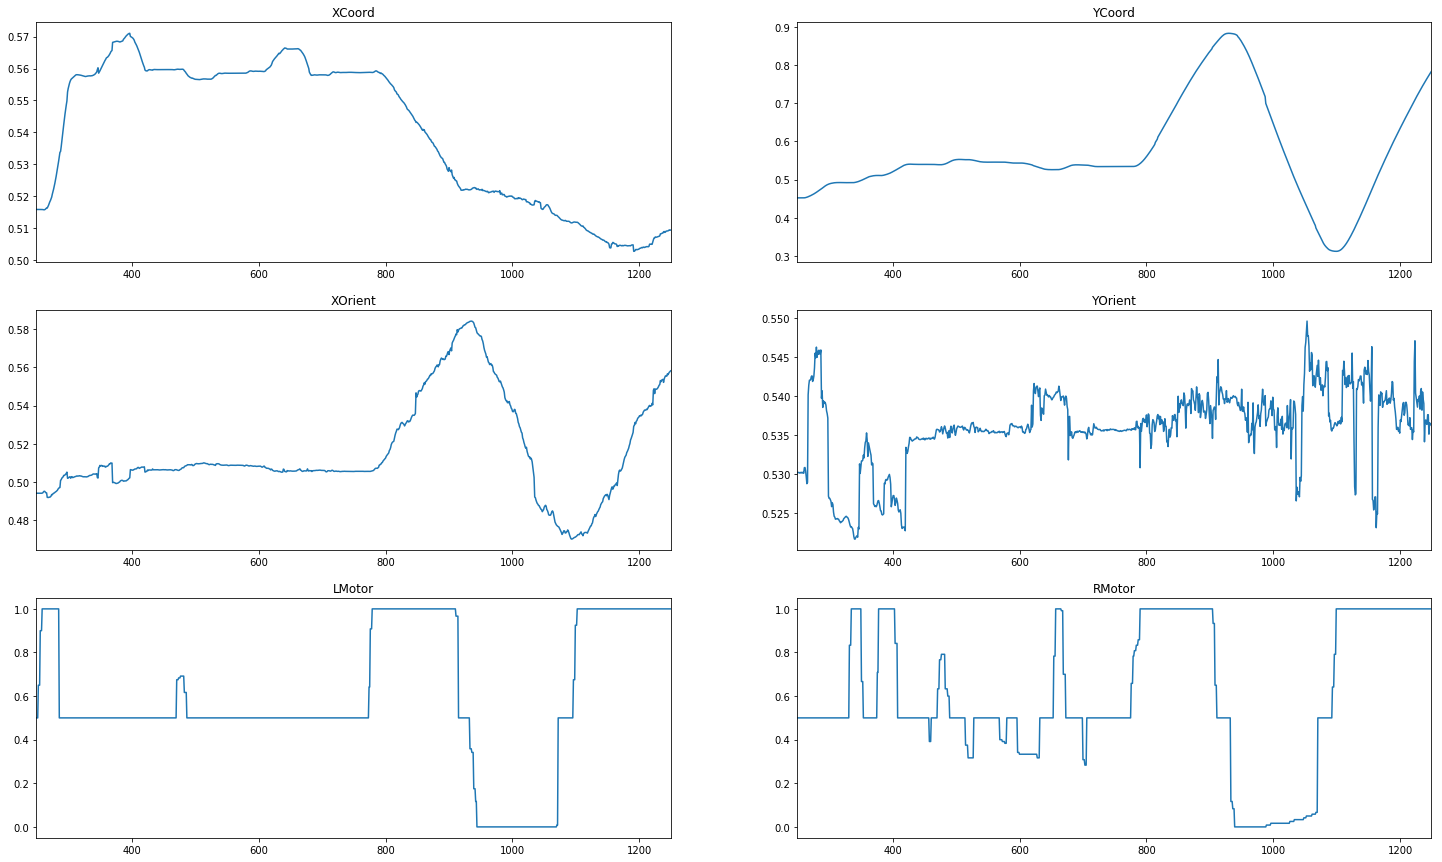

In [145]:
# NB: data will have to be normalised only based on training set (not testing) in the future

data_normalised = data_reduced.copy()

# z-score normalisation for orientation data
#data_normalised[['XOrient','YOrient']] = (data_normalised[['XOrient','YOrient']] - data_normalised[['XOrient','YOrient']].mean())/data_normalised[['XOrient','YOrient']].std()

# min-max normalisation for orientation data
#data_normalised[['XOrient','YOrient']] = (data_normalised[['XOrient','YOrient']] - data_normalised[['XOrient','YOrient']].min())/(data_normalised[['XOrient','YOrient']].max()-data_normalised[['XOrient','YOrient']].min())

# min-max normalisation for coordinates data
#data_normalised[['XCoord','YCoord']] = (data_reduced[['XCoord','YCoord']] - data_reduced[['XCoord','YCoord']].min())/(data_reduced[['XCoord','YCoord']].max()-data_reduced[['XCoord','YCoord']].min())

# zero-mean normalisation
# data_normalised = data_normalised - data_normalised.mean()

# min-max normalisation
data_normalised = (data_normalised - data_normalised.min())/(data_normalised.max() - data_normalised.min())

# data_reduced.head()
# data_normalised.head()

fig3, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_normalised['XCoord'].hist(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_normalised['YCoord'].hist(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_normalised['XOrient'].hist(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_normalised['YOrient'].hist(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_normalised['LMotor'].hist(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_normalised['RMotor'].hist(ax=axes[2,1]); axes[2,1].set_title('RMotor')


fig4, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_normalised['XCoord'][:1000].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_normalised['YCoord'][:1000].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_normalised['XOrient'][:1000].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_normalised['YOrient'][:1000].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_normalised['LMotor'][:1000].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_normalised['RMotor'][:1000].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

(71493, 6)
(7150, 6)


Text(0.5, 1.0, 'RMotor')

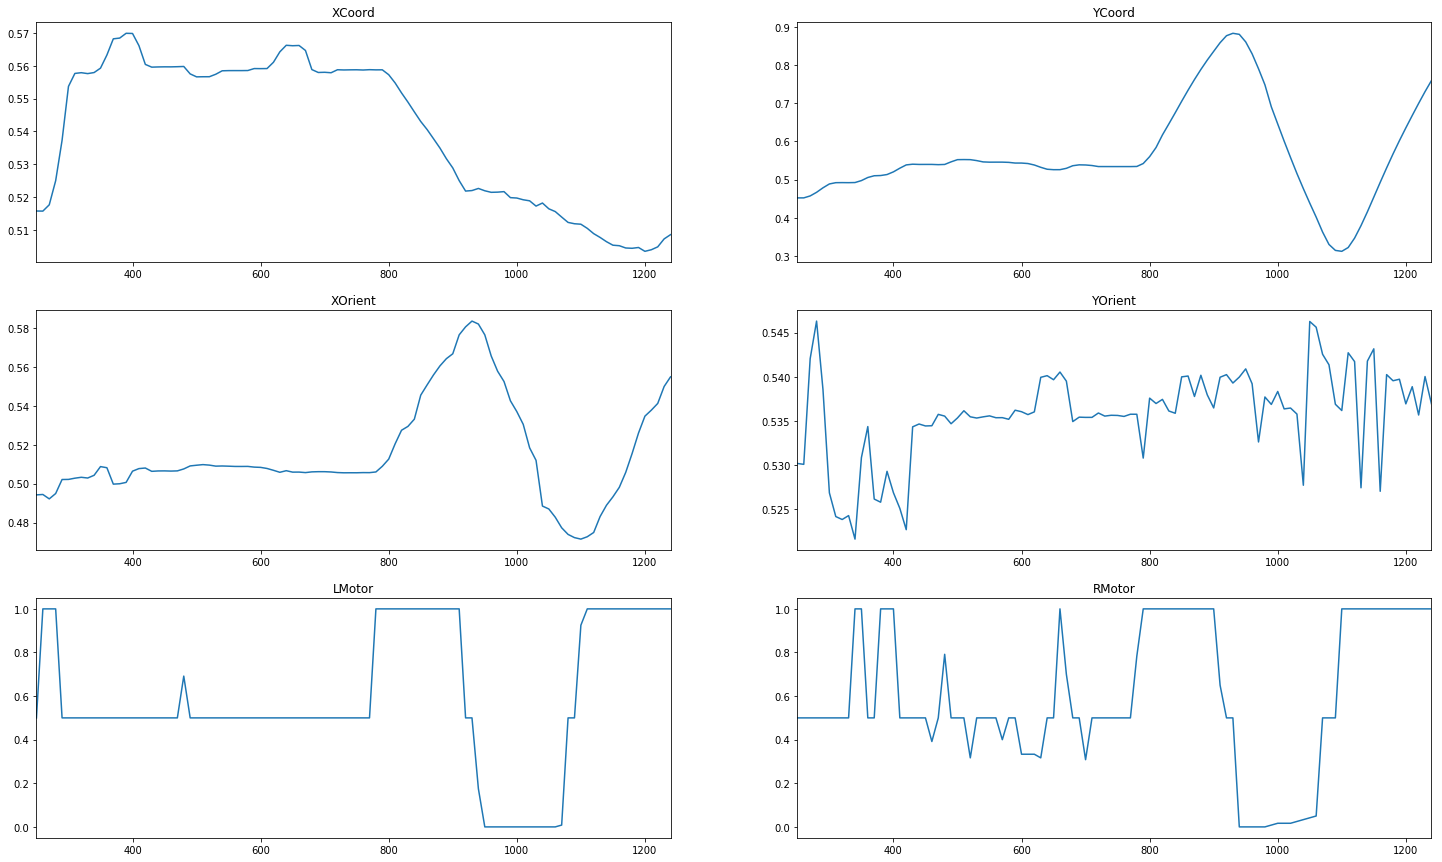

In [146]:
# subsample the data (now recordings at 100 Hz)
frames_skipped = 10
print(data_normalised.shape)
data_normalised_subsampled = data_normalised.iloc[::frames_skipped]
print(data_normalised_subsampled.shape)

fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_normalised_subsampled['XCoord'][:100].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_normalised_subsampled['YCoord'][:100].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_normalised_subsampled['XOrient'][:100].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_normalised_subsampled['YOrient'][:100].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_normalised_subsampled['LMotor'][:100].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_normalised_subsampled['RMotor'][:100].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

In [154]:
# save data to new csv file, without index
# data_reduced: data without z coordinate and orientation
# data_normalised: data_reduced min-max normalised
# data_normalised_subsampled: data_normalised subsampled
print(data_normalised.head())
print(data_normalised_subsampled.head())

data_normalised_subsampled.to_csv('Pre-processed_data.csv', index=False)

       XCoord    YCoord   XOrient   YOrient  LMotor  RMotor
250  0.515781  0.452303  0.494227  0.530181    0.50     0.5
251  0.515776  0.452306  0.494224  0.530145    0.50     0.5
252  0.515775  0.452304  0.494227  0.530193    0.50     0.5
253  0.515775  0.452304  0.494250  0.530163    0.65     0.5
254  0.515775  0.452305  0.494236  0.530089    0.65     0.5
       XCoord    YCoord   XOrient   YOrient  LMotor  RMotor
250  0.515781  0.452303  0.494227  0.530181     0.5     0.5
260  0.515750  0.452345  0.494429  0.530083     1.0     0.5
270  0.517672  0.457437  0.492171  0.542044     1.0     0.5
280  0.525007  0.466882  0.494916  0.546299     1.0     0.5
290  0.537307  0.478693  0.502117  0.538545     0.5     0.5
